# Crime Analysis of San Francisco Summer 2014

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sf = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

Cell Markdown

Let's clear out some less useful data and view a sample slice

In [4]:
sf.drop(["IncidntNum", "Location", "PdId"], axis=1, inplace=True, errors="ignore")
sf.sample(n=5)

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y
16794,OTHER OFFENSES,TRAFFIC VIOLATION,Friday,07/11/2014,07:45,BAYVIEW,NONE,3RD ST / WALLACE AV,-122.392899,37.728490
26433,LARCENY/THEFT,GRAND THEFT PICKPOCKET,Monday,06/09/2014,14:00,TENDERLOIN,NONE,100 Block of OFARRELL ST,-122.407244,37.786565
17947,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Monday,07/07/2014,13:19,MISSION,"ARREST, BOOKED",2100 Block of MARKET ST,-122.430019,37.766831
17393,WARRANTS,ENROUTE TO ADULT AUTHORITY,Wednesday,07/09/2014,09:50,TARAVAL,"ARREST, BOOKED",GREAT HY / SLOAT BL,-122.506714,37.735466
16466,WARRANTS,WARRANT ARREST,Saturday,07/12/2014,09:55,CENTRAL,"ARREST, BOOKED",GREENWICH ST / COLUMBUS AV,-122.412545,37.801931


## Temporal Analysis
Let's have a look at the most common crimes reported:

In [5]:
topninedescripts = sf['Descript'].value_counts().head(9)
print(topninedescripts)

GRAND THEFT FROM LOCKED AUTO      3766
STOLEN AUTOMOBILE                 1350
LOST PROPERTY                     1202
PETTY THEFT OF PROPERTY           1125
WARRANT ARREST                     980
PETTY THEFT FROM LOCKED AUTO       955
BATTERY                            903
FOUND PROPERTY                     757
GRAND THEFT FROM UNLOCKED AUTO     681
Name: Descript, dtype: int64


Let's look at the time of day crimes are reported:
    to do so, we index the time stamp data, adding a new column ('Hour') to our dataframe;
    then we plot Crime Reports vs Time of Day with Seaborn's countplot.

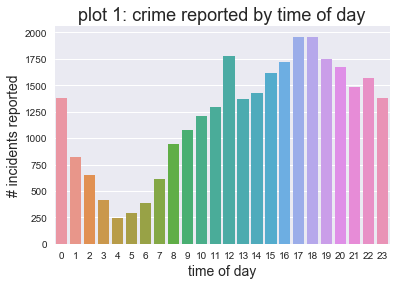

In [7]:
index = pd.DatetimeIndex(sf['Time'])
sf['Hour']=index.hour
sns.countplot('Hour',data=sf,order=range(24))
plt.xlabel("Time of Day", fontsize=14)
plt.ylabel("Number of Incidents Reported", fontsize=14)
plt.title("Plot 1: crime reported by TOD",fontsize=18)

We can see a trend in overall crime reports suggesting a global maxima in the early to mid evening.
Reports are at a low by 4am, and generally a midday spike in crime reports happens when folks are out to lunch.

Let's investiage how the most common report descriptors correlate with:

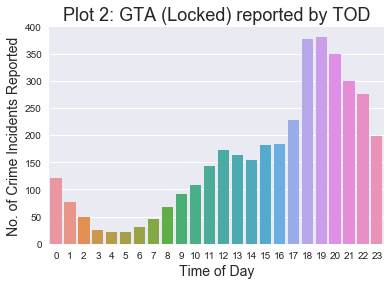

In [8]:
sns.countplot('Hour',data=sf[sf['Descript']=='GRAND THEFT FROM LOCKED AUTO'],order=range(24))
plt.xlabel("Time of Day", fontsize=14)
plt.ylabel("No. of Crime Incidents Reported", fontsize=14)
plt.title("Plot 2: GTA (Locked) reported by TOD",fontsize=18)

Grand theft larceny from locked automobiles is much more active at night.